## Spectral analysis of Audio signals in Python

Necessary imports

In [1]:
import os
import numpy as np
import scipy as sp
import librosa
import matplotlib.pyplot as plt
import IPython
import sounddevice as sd
import soundfile as sf

ModuleNotFoundError: No module named 'librosa'

Creating a sample sinusoid

In [ ]:
t = np.linspace(0,1,1000)
x = np.sin(2*np.pi*230*t) #since we are using natural frequency (in Hz) we define t in sec
# if we use a [0,2pi]-bounded frequency, n should take integer values.

In [ ]:
sd.play(x,1000)
sd.play(x,3000) #increasing the sampling rate -> higher frequency

In [ ]:
IPython.display.Audio(x,rate=1000)

Computing+plotting its DFT (in either linear or logarithmic scale)

In [ ]:
%matplotlib inline
y = np.fft.fft(x)
f = np.linspace(0,2*np.pi,1000)
plt.plot(f,np.abs(y))
plt.xlabel('Radial frequency')
plt.title('DFT of sinusoid')

In [ ]:
%matplotlib inline
y = np.fft.fft(x)
f = np.linspace(0,2*np.pi,1000)
plt.plot(f[1:],20*np.log(np.abs(y[1:])))
plt.xlabel('Radial frequency')
plt.title('DFT of sinusoid')

In [ ]:
%matplotlib inline
y_cut = y[:500]
f = np.linspace(0,500,500)
plt.plot(f,np.abs(y_cut))
plt.xlabel('Frequency (Hz)')
plt.title('DFT of sinusoid')

In [ ]:
print(np.argmax(np.abs(y_cut))) #index that corresponds to the peak of the DFT of the sinusoid

Repeating the above process for a noisy sinusoid

In [ ]:
t = np.linspace(0,1,1000)
x = np.sin(2*np.pi*230*t) + 0.15*np.random.normal(size=(1000,))

In [ ]:
sd.play(x,1000)

In [3]:
%matplotlib inline
y = np.fft.fft(x)
f = np.linspace(0,2*np.pi,1000)
plt.plot(f,np.abs(y))
plt.xlabel('Radial frequency')
plt.title('DFT of noisy sinusoid')

NameError: name 'x' is not defined

In [ ]:
print(np.argmax(np.abs(y[:500])))

Librosa: Loading a file + displaying its spectrogram

In [4]:
#sr = 22050
y,fs = librosa.load('song_excerpt_1.mp3',22050)

NameError: name 'librosa' is not defined

In [5]:
segment = y[:100000]
sd.play(y[:100000],fs)
%matplotlib inline
plt.plot(segment)

NameError: name 'y' is not defined

In [6]:
S = librosa.stft(segment,n_fft=1024,hop_length=512)
print(S.shape)

NameError: name 'librosa' is not defined

In [7]:
S2 = librosa.stft(segment,n_fft=512,hop_length=256) #number of horizontal/vertical bins is determined by n_fft/hop_length.
print(S2.shape)

NameError: name 'librosa' is not defined

Text(0.5, 1.0, 'STFT of the signal segment')

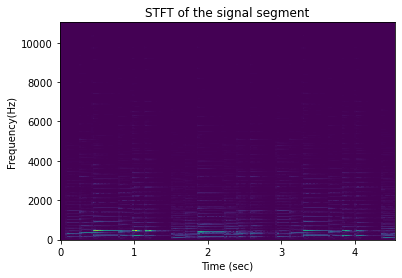

In [14]:
%matplotlib inline
t = np.linspace(0,100000/22050,196)
f = np.linspace(0,11025,513)
plt.pcolormesh(t,f,np.abs(S))
plt.xlabel('Time (sec)')
plt.ylabel('Frequency(Hz)')
plt.title('STFT of the signal segment')

C:\Users\USER\AppData\Local\Temp\ipykernel_4608\1987710709.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t,f,np.log10(np.abs(S))) #small constant is added for numerical stability


Text(0.5, 1.0, 'Log-STFT of the signal segment')

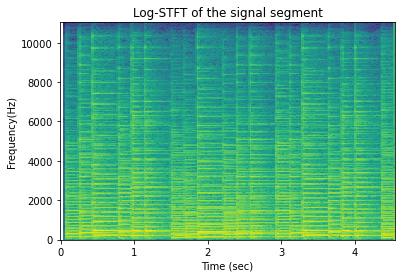

In [15]:
%matplotlib inline
plt.pcolormesh(t,f,np.log10(np.abs(S))) #small constant is added for numerical stability
plt.xlabel('Time (sec)')
plt.ylabel('Frequency(Hz)')
plt.title('Log-STFT of the signal segment')